In [635]:
# Importing warning filter
import warnings
warnings.filterwarnings('ignore')

In [636]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats import weightstats as stests
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 


import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Data Cleaning

In [637]:
# Reading the dataset
df = pd.read_csv('CO2_Emissions_Canada.csv')
# Obtaining basic information about the the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [638]:
# Observing a sample of the dataset - head
df.rename(columns={'CO2 Emissions(g/km)': 'CO2_Emissions'}, inplace=True)
df
#df.head()
#df.tail()
# df = df.drop(df.columns[[0, 1, 2, 5, 6]], axis=1)  # df.columns is zero-based pd.Index

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [639]:
# Checking if there are any missing values
df.isnull().values.any()

False

In [640]:
# Checking for duplicates
df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 1103 duplicates in the dataset.


In [641]:
# Removing duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()
print('There are a total of ' + (str(df.duplicated().sum()) + ' duplicates in the dataset.'))

There are a total of 0 duplicates in the dataset.


In [642]:
# Checking the new shape of the dataset
#df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              6282 non-null   object 
 1   Model                             6282 non-null   object 
 2   Vehicle Class                     6282 non-null   object 
 3   Engine Size(L)                    6282 non-null   float64
 4   Cylinders                         6282 non-null   int64  
 5   Transmission                      6282 non-null   object 
 6   Fuel Type                         6282 non-null   object 
 7   Fuel Consumption City (L/100 km)  6282 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   6282 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  6282 non-null   float64
 10  Fuel Consumption Comb (mpg)       6282 non-null   int64  
 11  CO2_Emissions                     6282 non-null   int64  
dtypes: flo

In [643]:
# Reseting the index
df = df.reset_index(drop = True)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [644]:
# Obtaining a statistical summary for the dataset
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Data Preparation:

As the categorical columns “Make”, “Model”, “Vehicle Class” and “Transmission” have numerous unique observations, encoding them would make the dataset extremely large in number of columns. So, they were dropped.

The only column that will be encoded is “Fuel Type”, so it will be possible to include it in the correlation analysis. The OneHotEncoder was the chosen method, because it derives the categories based on the unique values of the feature and does not create any unwanted rank, as it would be with the OrdinalEncoder. The “Fuel Type” variable has only 5 unique observation, but one of them appears just once, so it was dropped. It is the letter N, that represents the natural gas. After that, index was reset.

In [645]:
# Dropping all the categorical variables, except 'Fuel Type'
df = df.drop(columns = ['Make', 'Model', 'Vehicle Class', 'Transmission'], axis = 1)

In [646]:
# Dropping the only observation with 'Fuel Type' = N

df = df[df['Fuel Type'] != 'N']
df = df.reset_index(drop = True)
df.shape

(6281, 8)

In [647]:
# Enconding the variable 'Fuel Type'

ohe = OneHotEncoder(sparse = False)
df_fuel_type = ohe.fit_transform(fuel_type)
df_fuel_type = pd.DataFrame(df_fuel_type)
df_fuel_type.head(5)

,0,1,2,3
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [648]:
# Renaming the new columns of the encoded dataset

df_fuel_type.columns = ['Fuel_D', 'Fuel_E', 'Fuel_X', 'Fuel_Z']
df_fuel_type

,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
6276,0.0,0.0,0.0,1.0
6277,0.0,0.0,0.0,1.0
6278,0.0,0.0,0.0,1.0
6279,0.0,0.0,0.0,1.0


In [649]:
# Transforming the categorical column in an list of array

fuel_type = df['Fuel Type'].array
fuel_type = fuel_type.reshape(-1, 1)

In [650]:
# Joining the dataframes in one

df = df.join(df_fuel_type)
df = df.drop(columns = 'Fuel Type', axis = 1)
df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
0,2.0,4,9.9,6.7,8.5,33,196,0.0,0.0,0.0,1.0
1,2.4,4,11.2,7.7,9.6,29,221,0.0,0.0,0.0,1.0
2,1.5,4,6.0,5.8,5.9,48,136,0.0,0.0,0.0,1.0
3,3.5,6,12.7,9.1,11.1,25,255,0.0,0.0,0.0,1.0
4,3.5,6,12.1,8.7,10.6,27,244,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6276,2.0,4,10.7,7.7,9.4,30,219,0.0,0.0,0.0,1.0
6277,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,1.0
6278,2.0,4,11.7,8.6,10.3,27,240,0.0,0.0,0.0,1.0
6279,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,1.0


# OLS Regression Check significance

In [651]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
x = df[df.columns[df.columns != 'CO2_Emissions']]
y = df.CO2_Emissions
 
# Statsmodels.OLS requires us to add a constant.
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 9.139e+04
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:06:43   Log-Likelihood:                -19216.
No. Observations:                6281   AIC:                         3.845e+04
Df Residuals:                    6271   BIC:                         3.852e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

A p-value of less than 0.05 implies significance and that of less than 0.01 implies high significance. Therefore p=0.0000 implies high significance. 

X = Regular gasoline
Z = Premium gasoline
D = Diesel
E = Ethanol (E85)
N = Natural gas

# Wald test

In [652]:
# # Conduct a Wald test for equality of multiple coefficients
# x_vars = results.summary2().tables[1].index
# wald_str = ' = '.join(list(x_vars[1:10]))
# print(wald_str)
# wald_test = results.wald_test(wald_str) # joint test
# print(wald_test)

# Correlation Analysis (2 variables)

Before analysing the correlation between 2 specific variables, a heatmap and a pairplot were plotted for the whole dataset, in order to observe the correlation between all the variables and choose 2 for further analysis.

In the heatmap, it can be seen that all the fuel types do not have a strong correlation with “CO2 Emissions(g/km)”. On the other hand, “Engine Size(L)”, “Cylinders” and all types of fuel consumption have a strong correlation with CO2 emissions, having only one of them a negative correlation (“Fuel Consumption Comb (mpg)”).

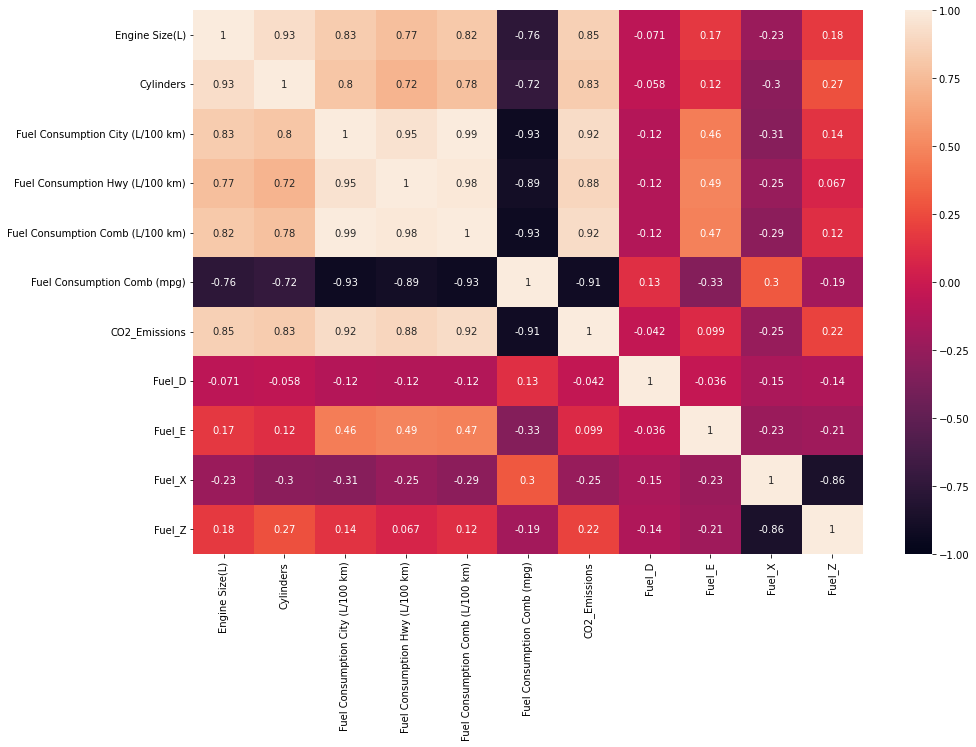

In [653]:
# Analysing the correlation between all variables

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

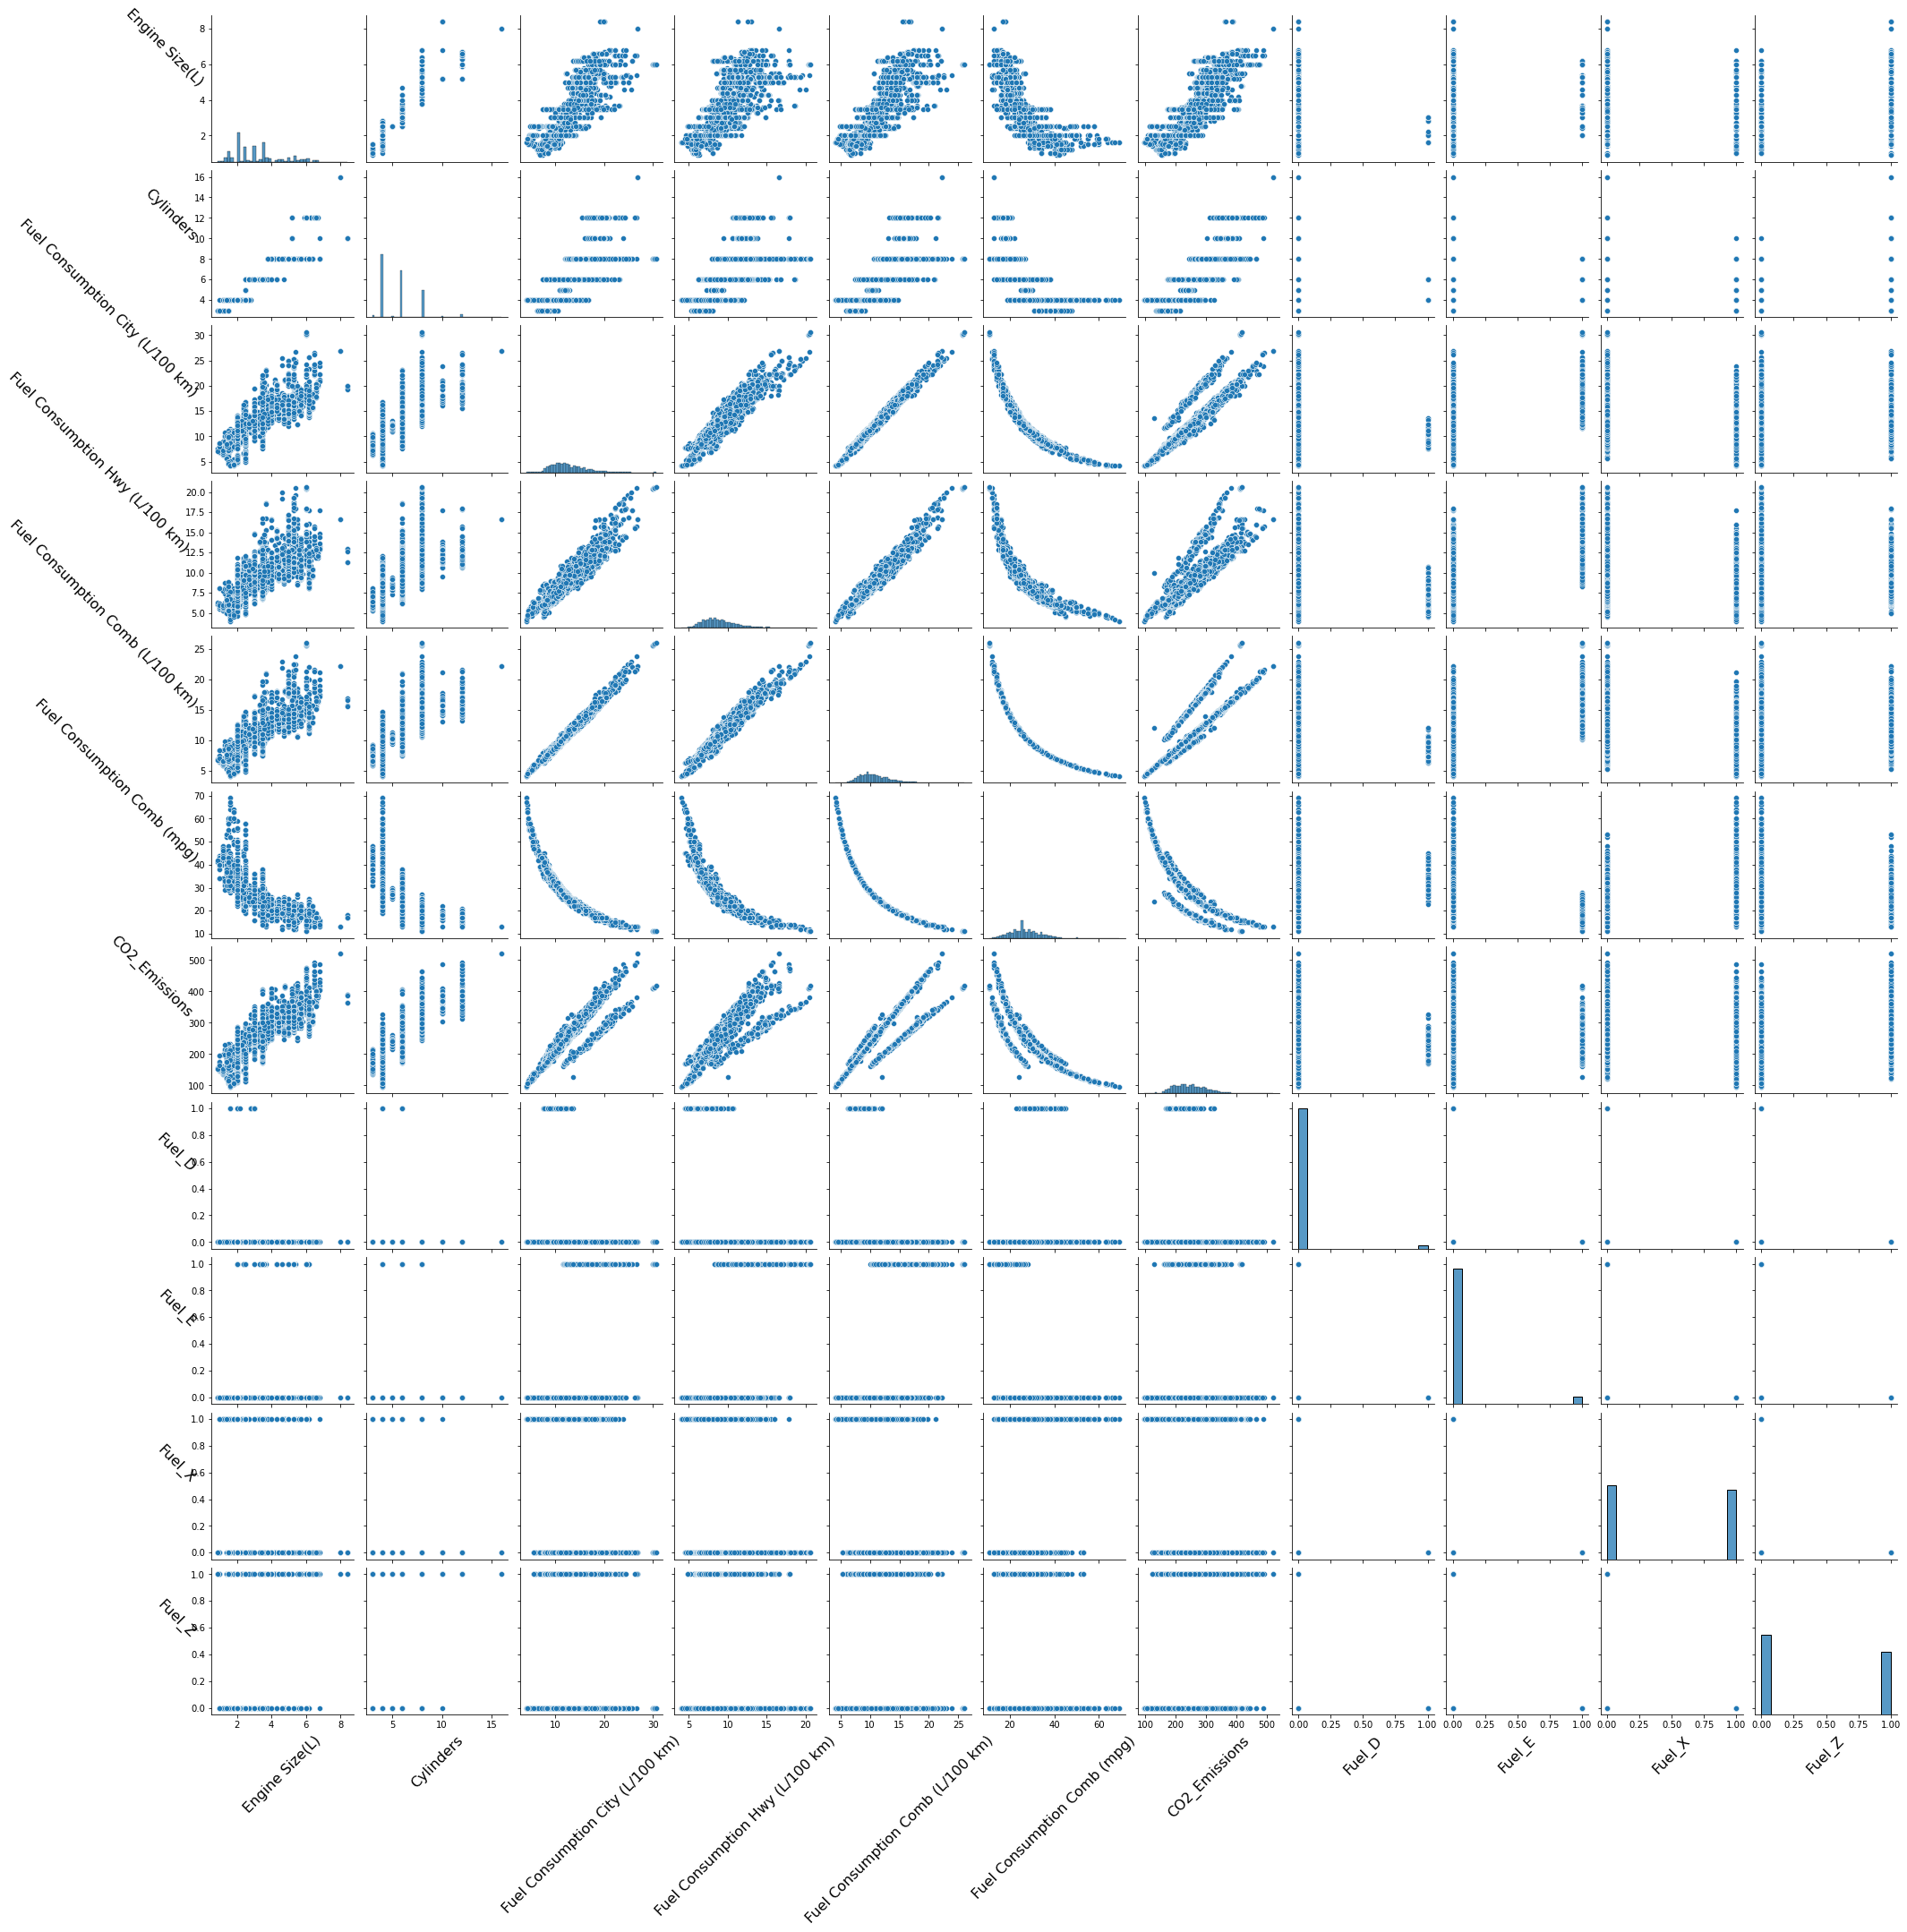

In [654]:
# Analysing the correlation between all variables - pairplot

all_pairs = sns.pairplot(df)

for ax in all_pairs.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45, fontsize = 16)
    ax.set_ylabel(ax.get_ylabel(), rotation = -45, fontsize = 16)
    ax.yaxis.get_label().set_horizontalalignment('right')

# Linear Regression Model

In [655]:
#split the data
from sklearn.model_selection import train_test_split
X = df.drop(['CO2_Emissions'], axis=1)
y = df['CO2_Emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Creating and Training the Model

In [656]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [657]:
#check R2 score
r2_score = regressor.score(X_test,y_test)
print("R2 score is:",r2_score)

R2 score is: 0.9914341432555234


In [658]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Engine Size(L),0.288766
Cylinders,1.025957
Fuel Consumption City (L/100 km),7.538225
Fuel Consumption Hwy (L/100 km),6.090936
Fuel Consumption Comb (L/100 km),6.356243
Fuel Consumption Comb (mpg),-0.867125
Fuel_D,49.961919
Fuel_E,-88.698214
Fuel_X,19.722363
Fuel_Z,19.013931


In [659]:
from sklearn import metrics
predictions = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 3.2110675416674686
Mean Squared Error: 30.284374517116497
Root Mean Square Error: 5.503124068846395


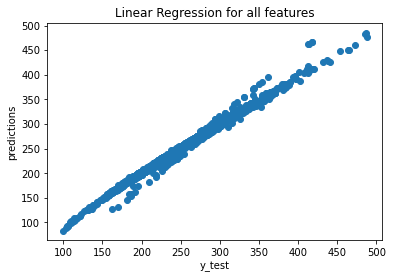

In [660]:
plt.scatter(y_test,predictions)
plt.title("Linear Regression for all features")
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

# Remain significant features for LR model

In [661]:
#split the data
from sklearn.model_selection import train_test_split
X = df.drop(['CO2_Emissions','Fuel Consumption City (L/100 km)','Fuel Consumption Comb (L/100 km)'], axis=1)
y = df['CO2_Emissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [662]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [663]:
#check R2 score
r2_score = regressor.score(X_test,y_test)
print("R2 score is:",r2_score)

R2 score is: 0.9762418427573324


In [664]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Engine Size(L),3.217308
Cylinders,4.322204
Fuel Consumption Hwy (L/100 km),15.725581
Fuel Consumption Comb (mpg),-2.750741
Fuel_D,44.462616
Fuel_E,-74.015912
Fuel_X,14.504442
Fuel_Z,15.048854


In [665]:
from sklearn import metrics
predictions = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 6.513684266096663
Mean Squared Error: 83.99637692253394
Root Mean Square Error: 9.164953732700123


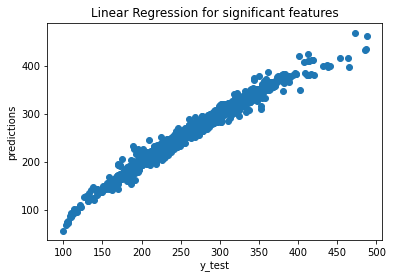

In [666]:
plt.scatter(y_test,predictions)
plt.title("Linear Regression for significant features")
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.show()

# Correlation analysis

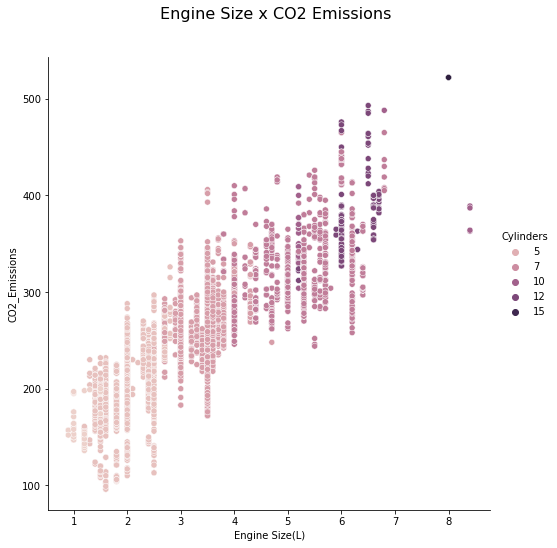

In [667]:
# Analysing the correlation between Engine Size and CO2 emissions


fuelcc_co2 = sns.pairplot(
    df,
    x_vars = ['Engine Size(L)'],
    y_vars = ['CO2_Emissions'],
    hue = 'Cylinders',
    height = 7
)

fuelcc_co2.fig.suptitle("Engine Size x CO2 Emissions", y = 1.08, fontsize = 16);

In [668]:
df2 = df.loc[:, ['Engine Size(L)', 'CO2_Emissions']]
df2

,Engine Size(L),CO2_Emissions
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
6276,2.0,219
6277,2.0,232
6278,2.0,240
6279,2.0,232


# Use MinMax Scaler

In [669]:
# recaling the variables (both)
df2_columns = df2.columns
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df2)

# rename columns (since now its an np array)
df2 = pd.DataFrame(df2)
df2.columns = df2_columns

df2

,Engine Size(L),CO2_Emissions
0,0.146667,0.234742
1,0.200000,0.293427
2,0.080000,0.093897
3,0.346667,0.373239
4,0.346667,0.347418
...,...,...
6276,0.146667,0.288732
6277,0.146667,0.319249
6278,0.146667,0.338028
6279,0.146667,0.319249


<AxesSubplot:xlabel='Engine Size(L)', ylabel='CO2_Emissions'>

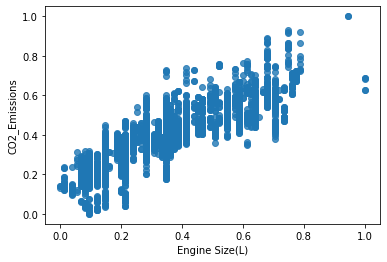

In [670]:
# visualise area-price relationship
sns.regplot(x="Engine Size(L)", y="CO2_Emissions", data=df2, fit_reg=False)

In [671]:
# split into train and test
df2_train, df2_test = train_test_split(df2, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df2_train))
print(len(df2_test))

4396
1885


In [672]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df2_train['Engine Size(L)']
X_train = X_train.values.reshape(-1, 1)
y_train = df2_train['CO2_Emissions']

X_test = df2_test['Engine Size(L)']
X_test = X_test.values.reshape(-1, 1)
y_test = df2_test['CO2_Emissions']

In [673]:
len(X_train)

4396

# Polynomial Regression

In [674]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

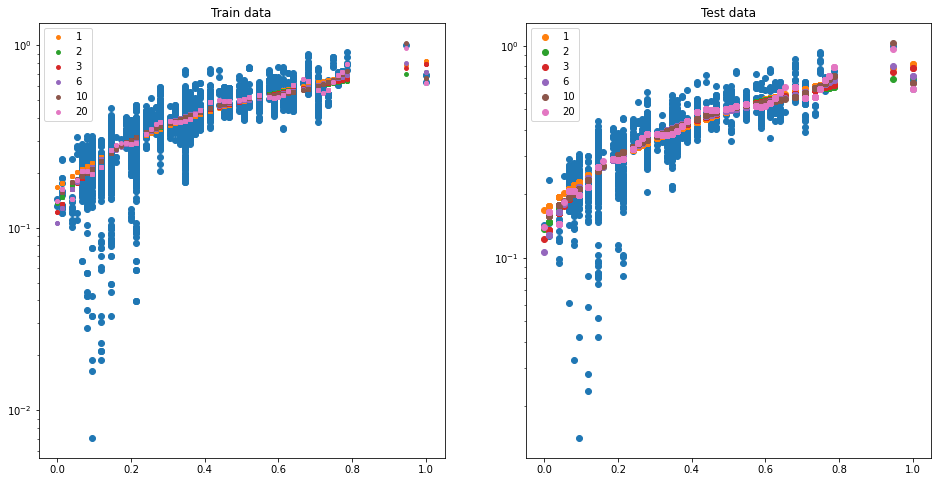

In [675]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [676]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.72, test score=0.75
Polynomial degree 2: train score=0.73, test score=0.75
Polynomial degree 3: train score=0.73, test score=0.75
Polynomial degree 6: train score=0.73, test score=0.76
Polynomial degree 10: train score=0.73, test score=0.76
Polynomial degree 20: train score=0.75, test score=0.78


In [677]:
# train-test 70-30 split
df_train, df_test = train_test_split(df, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

# rescale the features
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
numeric_vars = ['Engine Size(L)', 'Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])
df_train.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
944,0.013333,0.000000,0.103448,0.103030,0.105505,0.568966,147,0.0,0.0,0.0,1.0
3013,0.120000,0.076923,0.134100,0.121212,0.128440,0.517241,162,0.0,0.0,1.0,0.0
2928,0.360000,0.230769,0.356322,0.345455,0.353211,0.224138,277,0.0,0.0,0.0,1.0
4071,0.146667,0.076923,0.249042,0.230303,0.243119,0.327586,219,0.0,0.0,1.0,0.0
3312,0.453333,0.230769,0.352490,0.363636,0.357798,0.224138,279,0.0,0.0,1.0,0.0


In [678]:
# apply rescaling to the test set also
df_test[numeric_vars] = scaler.fit_transform(df_test[numeric_vars])
df_test.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_Emissions,Fuel_D,Fuel_E,Fuel_X,Fuel_Z
5756,0.266667,0.333333,0.367424,0.371951,0.369863,0.214286,288,0.0,0.0,0.0,1.0
2311,0.640000,0.555556,0.401515,0.310976,0.369863,0.214286,289,0.0,0.0,1.0,0.0
2055,0.280000,0.333333,0.375000,0.347561,0.365297,0.214286,285,0.0,0.0,0.0,1.0
411,0.146667,0.111111,0.238636,0.176829,0.219178,0.357143,207,0.0,0.0,1.0,0.0
4293,0.733333,0.555556,0.534091,0.487805,0.520548,0.125000,363,0.0,0.0,0.0,1.0


In [679]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('CO2_Emissions')
X_train = df_train

y_test = df_test.pop('CO2_Emissions')
X_test = df_test

In [680]:
# num of max features
len(X_train.columns)

10

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

In [681]:
# first model with an arbitrary choice of n_features
# running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=8)             
rfe = rfe.fit(X_train, y_train)

In [682]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Engine Size(L)', False, 3),
 ('Cylinders', False, 2),
 ('Fuel Consumption City (L/100 km)', True, 1),
 ('Fuel Consumption Hwy (L/100 km)', True, 1),
 ('Fuel Consumption Comb (L/100 km)', True, 1),
 ('Fuel Consumption Comb (mpg)', True, 1),
 ('Fuel_D', True, 1),
 ('Fuel_E', True, 1),
 ('Fuel_X', True, 1),
 ('Fuel_Z', True, 1)]

In [683]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9882984860360426


the higher the R-squared, the better the model fits your data.

In [684]:
# try with another value of RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=6)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9883015373986948


In [685]:
# k-fold CV (using all the 10 variables)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores     

array([0.99145421, 0.99242858, 0.99189422, 0.99373288, 0.99372014])

In [686]:
# the other way of doing the same thing (more explicit)
# create a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.99382709, 0.99248421, 0.99432474, 0.99224427, 0.99080661])

In [687]:
#show other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-30.82611417, -25.52172784, -28.20394479, -23.0556162 ,
       -21.20850252])

# Grid Search Cross-Validation

In [688]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 11))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10]}],
             return_train_score=True, scoring='r2', verbose=1)

In [689]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007590,0.002401,0.000812,0.000126,1,{'n_features_to_select': 1},0.857695,0.846308,0.860409,0.833238,...,0.843118,0.015831,10,0.839935,0.842636,0.839012,0.845972,0.849673,0.843446,0.003945
1,0.008176,0.002320,0.000908,0.000138,2,{'n_features_to_select': 2},0.987156,0.984559,0.989162,0.983622,...,0.985236,0.002638,9,0.984831,0.985458,0.984293,0.985706,0.986188,0.985295,0.000665
2,0.004925,0.000985,0.000726,0.000046,3,{'n_features_to_select': 3},0.987271,0.984602,0.989369,0.983934,...,0.985455,0.002566,8,0.985086,0.985730,0.984527,0.985913,0.986362,0.985523,0.000645
3,0.004412,0.000705,0.000686,0.000004,4,{'n_features_to_select': 4},0.987363,0.984634,0.989367,0.983964,...,0.985479,0.002581,7,0.985100,0.985762,0.984567,0.985946,0.986409,0.985557,0.000649
4,0.005036,0.001531,0.000810,0.000283,5,{'n_features_to_select': 5},0.987660,0.985615,0.989606,0.984687,...,0.986228,0.002158,6,0.985985,0.986481,0.985470,0.986731,0.986985,0.986330,0.000543
5,0.004685,0.002118,0.000663,0.000009,6,{'n_features_to_select': 6},0.993753,0.992277,0.994080,0.991899,...,0.992412,0.001445,5,0.992167,0.992521,0.992061,0.992622,0.993073,0.992489,0.000359
6,0.002943,0.000508,0.000662,0.000004,7,{'n_features_to_select': 7},0.993770,0.992271,0.994077,0.991906,...,0.992418,0.001441,3,0.992173,0.992532,0.992072,0.992631,0.993078,0.992497,0.000358
7,0.002273,0.000139,0.000660,0.000004,8,{'n_features_to_select': 8},0.993770,0.992271,0.994077,0.991906,...,0.992418,0.001441,3,0.992173,0.992532,0.992072,0.992631,0.993078,0.992497,0.000358
8,0.002353,0.001196,0.000665,0.000014,9,{'n_features_to_select': 9},0.993819,0.992494,0.994318,0.992231,...,0.992735,0.001241,2,0.992579,0.992902,0.992438,0.992974,0.993302,0.992839,0.000305
9,0.001260,0.000034,0.000649,0.000002,10,{'n_features_to_select': 10},0.993827,0.992484,0.994325,0.992244,...,0.992737,0.001244,1,0.992583,0.992910,0.992443,0.992975,0.993310,0.992844,0.000306


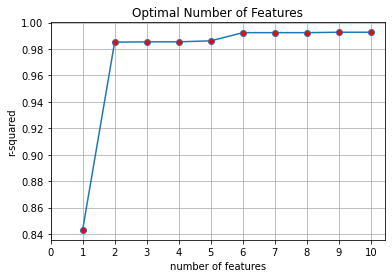

In [693]:
# plotting cv results
#plt.figure(figsize=(16,6))
plt.figure()

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"], marker='o',markerfacecolor='red')
#plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"], marker='o',markerfacecolor='red')
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
#plt.legend(['test score', 'train score'], loc='upper left')
plt.xticks(np.arange(0, len(cv_results["param_n_features_to_select"])+1, 1))
plt.grid()
plt.show()



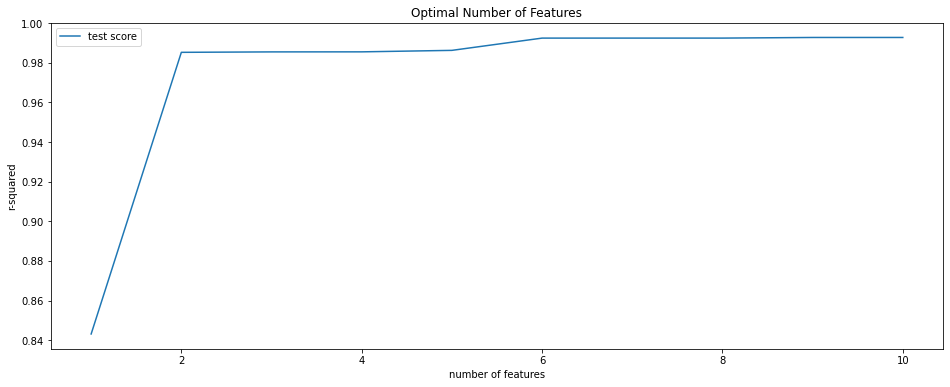

In [691]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
#plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [692]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9902560026396514
